BTP


In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


data = pd.read_excel('data.xlsx')
data.head()

,Material,Length (ft),Height (ft),Aspect ratio,sheathing (mm),studs (depth x flange x t),YIELD STRESS,Field spa (mm),Perimeter spa (mm),Stiffness (N/mm),Elastic (kN),ultimate (kN),D elastic (mm),D Ultimate (mm),Ductillity
0,Gypsum-1,12.0,12.0,1.000000,12.7,88.9 x - x 0.81,NaN,305,305,2275.0,7.1973,21.81,3.163648,0.0,NaN
1,Gypsum-2,16.0,12.0,0.750000,12.7,88.9 x - x 0.81,NaN,305,305,1767.5,9.1542,27.74,5.179180,0.0,NaN
2,Gypsum-3,24.0,12.0,0.500000,12.7,88.9 x - x 0.81,NaN,305,305,2170.0,12.6489,38.33,5.828986,0.0,NaN
3,Gypsum-4,12.0,10.0,0.833333,12.7,88.9 x - x 0.81,NaN,305,305,1802.5,6.5340,19.80,3.624965,0.0,NaN
4,Gypsum-5,16.0,10.0,0.625000,12.7,88.9 x - x 0.81,NaN,305,305,2537.5,8.2698,25.06,3.259034,0.0,NaN


In [5]:
data.shape

(422, 15)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material                    398 non-null    object 
 1   Length (ft)                 402 non-null    float64
 2   Height (ft)                 402 non-null    float64
 3   Aspect ratio                400 non-null    float64
 4   sheathing (mm)              390 non-null    object 
 5   studs (depth x flange x t)  379 non-null    object 
 6   YIELD STRESS                330 non-null    object 
 7   Field spa (mm)              340 non-null    object 
 8   Perimeter spa (mm)          357 non-null    object 
 9   Stiffness (N/mm)            238 non-null    float64
 10  Elastic (kN)                182 non-null    float64
 11  ultimate (kN)               389 non-null    float64
 12  D elastic (mm)              154 non-null    float64
 13  D Ultimate (mm)             363 non

In [7]:
print(data['sheathing (mm)'].unique())
print(data['Material'].unique())
print(data['studs (depth x flange x t)'].unique())
print(data['YIELD STRESS'].unique())
print(data['Perimeter spa (mm)'].unique())
print(data['Field spa (mm)'].unique())



[12.7 15.8 22.2 11.7 15.7 22.5 nan 13 12.5 8 0.88 1.22 1.52 1.91 9 12 10
 '50.8x0.81' '50.8x0.82' '50.8x0.83' '12.5+ 50x0.81' '12.5+ 50x0.82'
 '12.5+ 50x0.83' '12.5+ 50x0.84' '12.5+ 50x0.85' 11 18 13.5 14.5 5 11.1 15
 0.84 0.762 0.686 0.838 0.76 0.46 0.69 0.5 '0.5-15' '0.5-10' '0.5+15-15'
 '0.5+10-15' '0.5+10-10' 0.457 0.8 0.9]
['Gypsum-1' 'Gypsum-2' 'Gypsum-3' 'Gypsum-4' 'Gypsum-5' 'Gypsum-6'
 'Gypsum-7' 'Gypsum-8' 'Gypsum-9' 'Gypsum-10' 'Gypsum-11' 'Gypsum-12'
 'Gypsum-13' 'Gypsum-14' 'Gypsum-15' 'Gypsum-16' 'Gypsum-17' 'Gypsum-18'
 'Cement plaster' 'A' 'B' 'E' 'G' 'K' 'L' 'M OPPFACE' 'N OPPFACE' 'P' 'Q'
 'R' 'C' 'D ' 'D CYCLIC' 'E CYCLIC' 'F' 'G Stucco' 'H' 'H CYCLIC'
 'I 2 layers gypsum' 'J cement plaster' 'M' 'N plywood and gypsum' 'D'
 'I CORRUG' '2 CORRUG + GYP' '3 STRAP' '4 CORRU + OPENING' '5 OSB'
 '5 OSB + OPENING' nan 'CHIPBOARD' 'GYP FIBER' 'CEMNT FIBER'
 'CEM FIB + GYP FIB' 'CHIP + GYP FIB' 'CORRU + GYP FIB' '1A' '1B' '1C'
 '3A' '3B' '3C' '5A' '5B' '5C' '2A' '2B' '2C' '4A'

In [28]:
data.groupby('sheathing (mm)').size()
data.groupby('Material').size()
data.groupby('studs (depth x flange x t)').size()
data.groupby('YIELD STRESS').size()
data.groupby('Perimeter spa (mm)').size()
data.groupby('Field spa (mm)').size()

,0
Field spa (mm),
0,6
50,2
95,1
100,8
102,1
105,2
127,10
150,47
152,10


In [47]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
data_mod_lc = data.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# List of columns to encode
cols_to_encode = ['sheathing (mm)', 'Material', 'YIELD STRESS',
                  'studs (depth x flange x t)', 'Perimeter spa (mm)', 'Field spa (mm)']

# Apply LabelEncoder to each column after converting to string
for col in cols_to_encode:
    # Convert all values to strings to handle mixed types
    data_mod_lc[col] = data_mod_lc[col].astype(str)

    # Apply LabelEncoder
    data_mod_lc[col] = le.fit_transform(data_mod_lc[col])

# Print first 10 rows to check
data_mod_lc.tail (10)


,Material,Length (ft),Height (ft),Aspect ratio,sheathing (mm),studs (depth x flange x t),YIELD STRESS,Field spa (mm),Perimeter spa (mm),Stiffness (N/mm),Elastic (kN),ultimate (kN),D elastic (mm),D Ultimate (mm),Ductillity
412,30,2.0,8.0,4.000000,8,70,13,24,26,660.0,30.52,34.95,46.2,97.2,2.530000
413,125,8.0,10.0,1.250000,12,68,13,13,13,2861.0,22.30,20.70,26.2,35.7,1.362595
414,125,8.0,10.0,1.250000,16,12,13,13,13,6250.0,31.70,32.00,18.6,34.5,1.854839
415,124,8.0,10.0,1.250000,16,13,13,13,13,4600.0,42.50,40.00,38.9,64.9,1.668380
416,124,8.0,10.0,1.250000,12,13,13,13,13,4178.0,41.90,37.40,40.5,57.5,1.419753
417,124,4.0,10.0,2.500000,12,13,13,13,13,3489.0,39.90,38.10,49.5,70.2,1.418182
418,124,12.0,10.0,0.833333,12,13,13,13,13,7120.0,46.10,42.00,22.3,42.9,1.923767
419,123,8.0,10.0,1.250000,16,13,13,13,13,5204.0,32.10,32.10,32.7,75.1,2.296636
420,124,8.0,10.0,1.250000,16,12,13,13,13,3923.0,31.20,31.90,34.6,66.2,1.913295
421,124,8.0,10.0,1.250000,16,13,13,13,13,4433.0,42.50,37.70,28.1,67.3,2.395018


In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
data_mod_lc = data.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# List of columns to encode
cols_to_encode = ['sheathing (mm)', 'YIELD STRESS', 'Material',
                  'studs (depth x flange x t)', 'Perimeter spa (mm)', 'Field spa (mm)']

# Create dictionaries to hold the mappings
dictionaries = {}

# Apply LabelEncoder and create mapping dictionaries
for col in cols_to_encode:
    # Fill NaN values with 'Unknown' for consistency if needed
    data_mod_lc[col].fillna('Unknown', inplace=True)

    # Fit and transform the column
    encoded_values = le.fit_transform(data_mod_lc[col].astype(str))
    data_mod_lc[col] = encoded_values

    # Create a mapping dictionary for the current column
    dictionaries[col] = dict(zip(le.transform(le.classes_), le.classes_))

# Print the mapping dictionaries
for col, mapping in dictionaries.items():
    print(f"{col} dictionary:", mapping)


sheathing (mm) dictionary: {0: '0.457', 1: '0.46', 2: '0.5', 3: '0.5+10-10', 4: '0.5+10-15', 5: '0.5+15-15', 6: '0.5-10', 7: '0.5-15', 8: '0.686', 9: '0.69', 10: '0.76', 11: '0.762', 12: '0.8', 13: '0.838', 14: '0.84', 15: '0.88', 16: '0.9', 17: '1.22', 18: '1.52', 19: '1.91', 20: '10', 21: '11', 22: '11.1', 23: '11.7', 24: '12', 25: '12.5', 26: '12.5+ 50x0.81', 27: '12.5+ 50x0.82', 28: '12.5+ 50x0.83', 29: '12.5+ 50x0.84', 30: '12.5+ 50x0.85', 31: '12.7', 32: '13', 33: '13.5', 34: '14.5', 35: '15', 36: '15.7', 37: '15.8', 38: '18', 39: '22.2', 40: '22.5', 41: '5', 42: '50.8x0.81', 43: '50.8x0.82', 44: '50.8x0.83', 45: '8', 46: '9', 47: 'Unknown'}
YIELD STRESS dictionary: {0: '2 CORNERS SET', 1: '210', 2: '220', 3: '225', 4: '227', 5: '227.5', 6: '230', 7: '245', 8: '280', 9: '310', 10: '320', 11: '325', 12: '340', 13: '345', 14: '350', 15: '385', 16: '4 CORNES SET', 17: 'NO SET CORNERS', 18: 'Unknown'}
Material dictionary: {0: '12 x 2 inch staggered', 1: '12 x 2 inch vertical', 2: '12

In [72]:
import pandas as pd

# Replace categorical columns with one-hot encoded columns
data_one_hot = pd.get_dummies(data_mod_lc, columns=['Material', 'sheathing (mm)', 'studs (depth x flange x t)', 'YIELD STRESS'], drop_first=True)

# Display the first few rows of the updated DataFrame
data_one_hot.head()


,Length (ft),Height (ft),Aspect ratio,Field spa (mm),Perimeter spa (mm),Stiffness (N/mm),Elastic (kN),ultimate (kN),D elastic (mm),D Ultimate (mm),...,YIELD STRESS_9,YIELD STRESS_10,YIELD STRESS_11,YIELD STRESS_12,YIELD STRESS_13,YIELD STRESS_14,YIELD STRESS_15,YIELD STRESS_16,YIELD STRESS_17,YIELD STRESS_18
0,12.0,12.0,1.000000,15,12,2275.0,7.1973,21.81,3.163648,0.0,...,False,False,False,False,False,False,False,False,False,True
1,16.0,12.0,0.750000,15,12,1767.5,9.1542,27.74,5.179180,0.0,...,False,False,False,False,False,False,False,False,False,True
2,24.0,12.0,0.500000,15,12,2170.0,12.6489,38.33,5.828986,0.0,...,False,False,False,False,False,False,False,False,False,True
3,12.0,10.0,0.833333,15,12,1802.5,6.5340,19.80,3.624965,0.0,...,False,False,False,False,False,False,False,False,False,True
4,16.0,10.0,0.625000,15,12,2537.5,8.2698,25.06,3.259034,0.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
X = data.loc[:, data.columns != 'FailureMode']
y=data['FailureMode']
X.head()

In [49]:
data_mod_lc.isnull().sum()



,0
Material,0
Length (ft),20
Height (ft),20
Aspect ratio,22
sheathing (mm),0
studs (depth x flange x t),0
YIELD STRESS,0
Field spa (mm),0
Perimeter spa (mm),0
Stiffness (N/mm),184


In [56]:

data_mod_lc['ultimate (kN)'].fillna(data_mod_lc['ultimate (kN)'].mean(), inplace=True)
data_mod_lc.head()

,Material,Length (ft),Height (ft),Aspect ratio,sheathing (mm),studs (depth x flange x t),YIELD STRESS,Field spa (mm),Perimeter spa (mm),Stiffness (N/mm),Elastic (kN),ultimate (kN),D elastic (mm),D Ultimate (mm),Ductillity
0,85,12.0,12.0,1.000000,31,30,18,15,12,2275.0,7.1973,21.81,3.163648,0.0,NaN
1,95,16.0,12.0,0.750000,31,30,18,15,12,1767.5,9.1542,27.74,5.179180,0.0,NaN
2,96,24.0,12.0,0.500000,31,30,18,15,12,2170.0,12.6489,38.33,5.828986,0.0,NaN
3,97,12.0,10.0,0.833333,31,30,18,15,12,1802.5,6.5340,19.80,3.624965,0.0,NaN
4,98,16.0,10.0,0.625000,31,30,18,15,12,2537.5,8.2698,25.06,3.259034,0.0,NaN


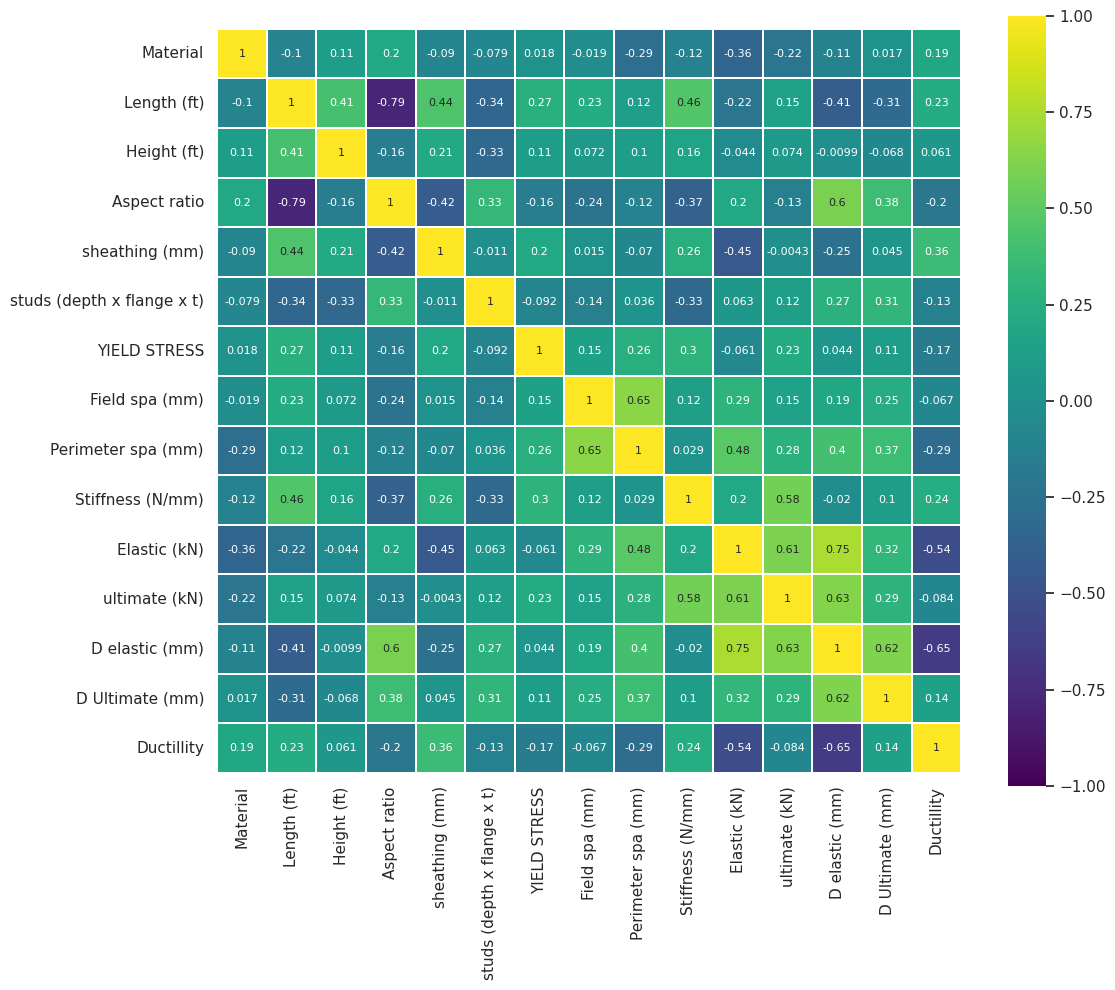

In [57]:
# Compute correlation matrix
corr = data_mod_lc.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

# Show plot
plt.show()

In [58]:
data_mod_lc.head()

,Material,Length (ft),Height (ft),Aspect ratio,sheathing (mm),studs (depth x flange x t),YIELD STRESS,Field spa (mm),Perimeter spa (mm),Stiffness (N/mm),Elastic (kN),ultimate (kN),D elastic (mm),D Ultimate (mm),Ductillity
0,85,12.0,12.0,1.000000,31,30,18,15,12,2275.0,7.1973,21.81,3.163648,0.0,NaN
1,95,16.0,12.0,0.750000,31,30,18,15,12,1767.5,9.1542,27.74,5.179180,0.0,NaN
2,96,24.0,12.0,0.500000,31,30,18,15,12,2170.0,12.6489,38.33,5.828986,0.0,NaN
3,97,12.0,10.0,0.833333,31,30,18,15,12,1802.5,6.5340,19.80,3.624965,0.0,NaN
4,98,16.0,10.0,0.625000,31,30,18,15,12,2537.5,8.2698,25.06,3.259034,0.0,NaN


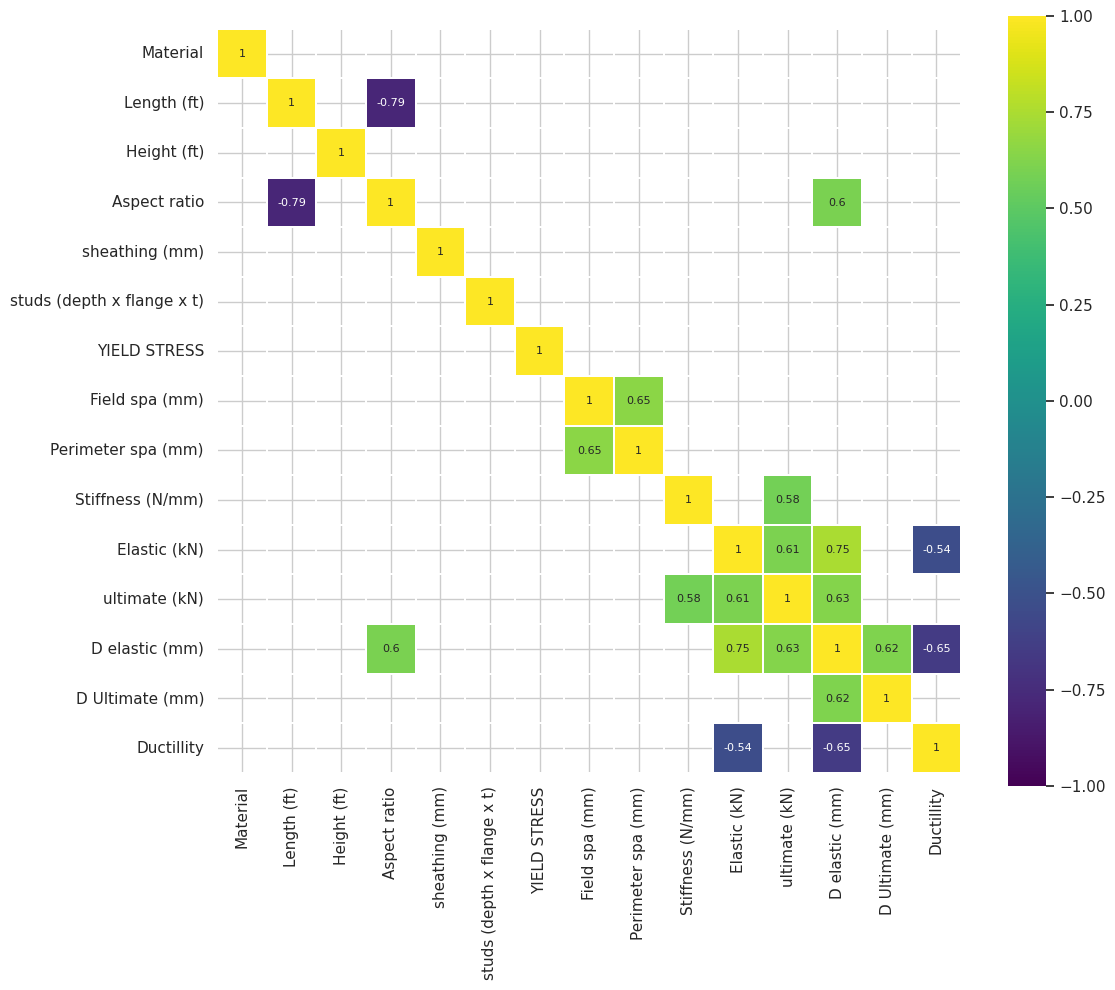

In [59]:

corr = data_mod_lc.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [62]:
features = list(data.columns.values)
print(features)

['Material', 'Length (ft)', 'Height (ft)', 'Aspect ratio ', 'sheathing (mm)', 'studs (depth x flange x t)', 'YIELD STRESS', 'Field spa (mm)', 'Perimeter spa (mm)', 'Stiffness (N/mm)', 'Elastic (kN)', 'ultimate (kN)', 'D elastic (mm)', 'D Ultimate (mm) ', 'Ductillity']


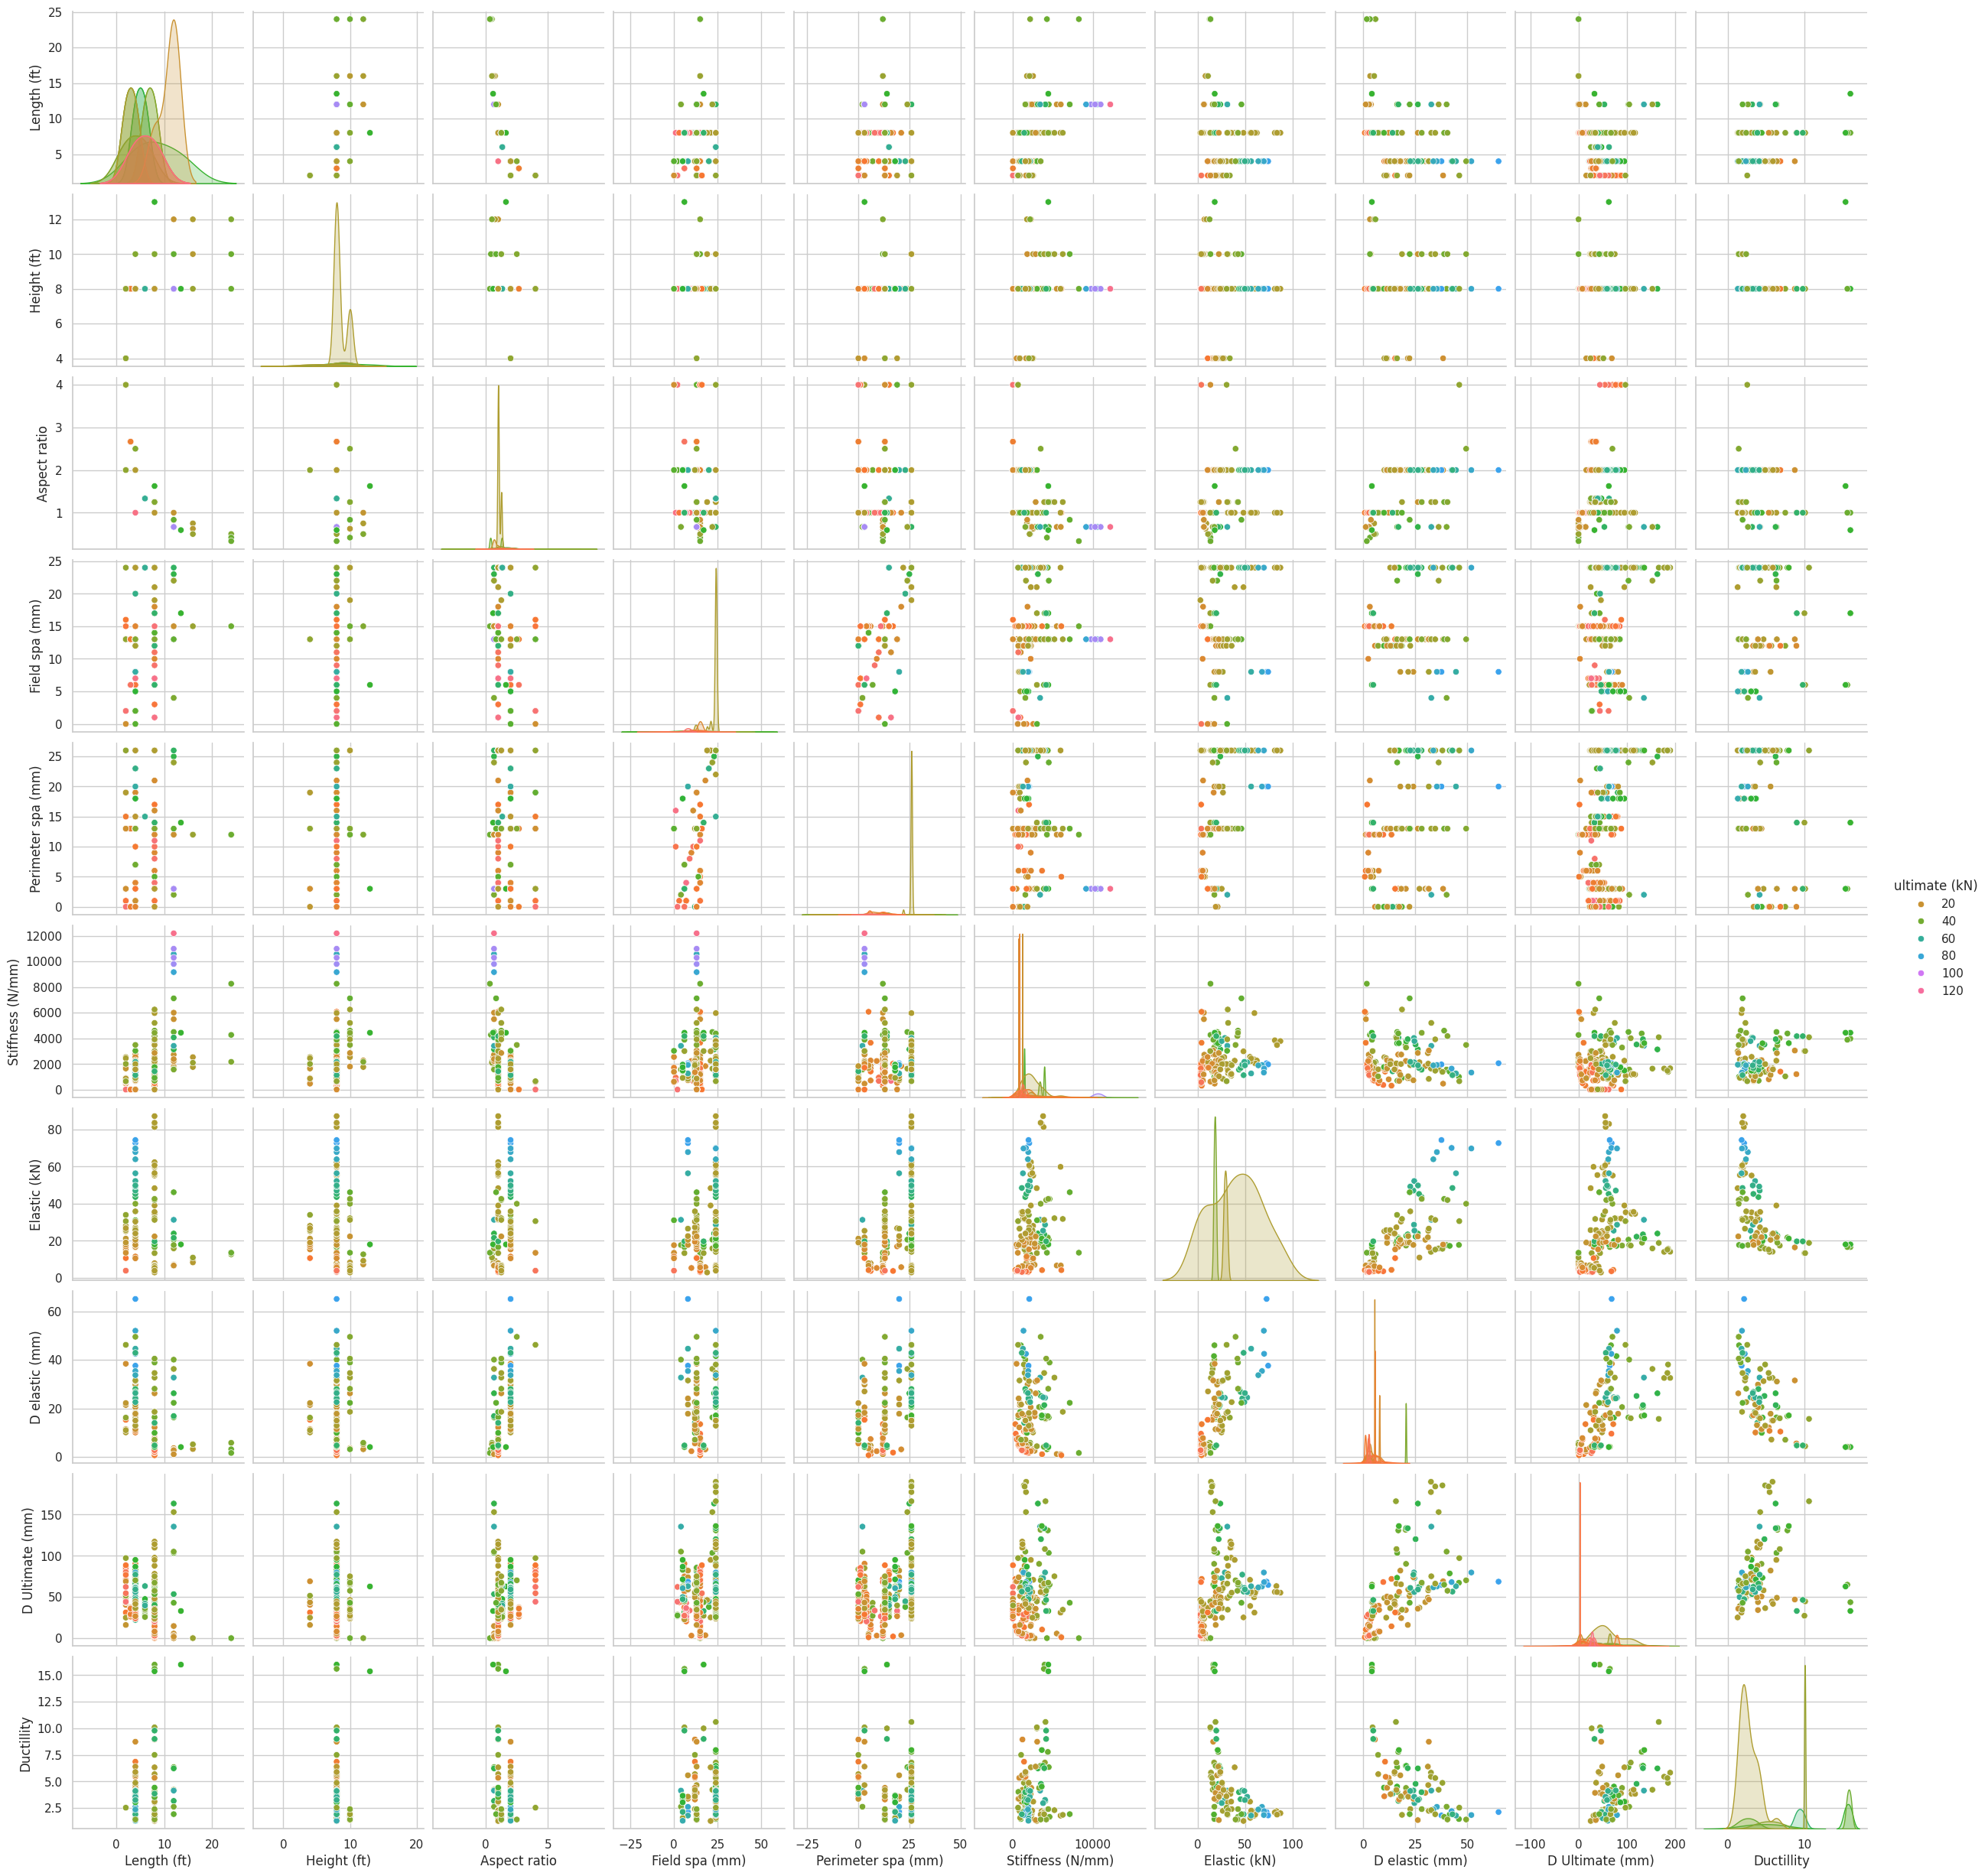

In [65]:
import seaborn as sns

quantitative_features_list1 = [ 'Length (ft)', 'Height (ft)', 'Aspect ratio', 'Field spa (mm)', 'Perimeter spa (mm)', 'Stiffness (N/mm)', 'Elastic (kN)', 'ultimate (kN)', 'D elastic (mm)', 'D Ultimate (mm)', 'Ductillity']

data_plot_data=data_mod_num = data_mod_lc[quantitative_features_list1]
sns.pairplot(data_plot_data, hue="ultimate (kN)", palette="husl")

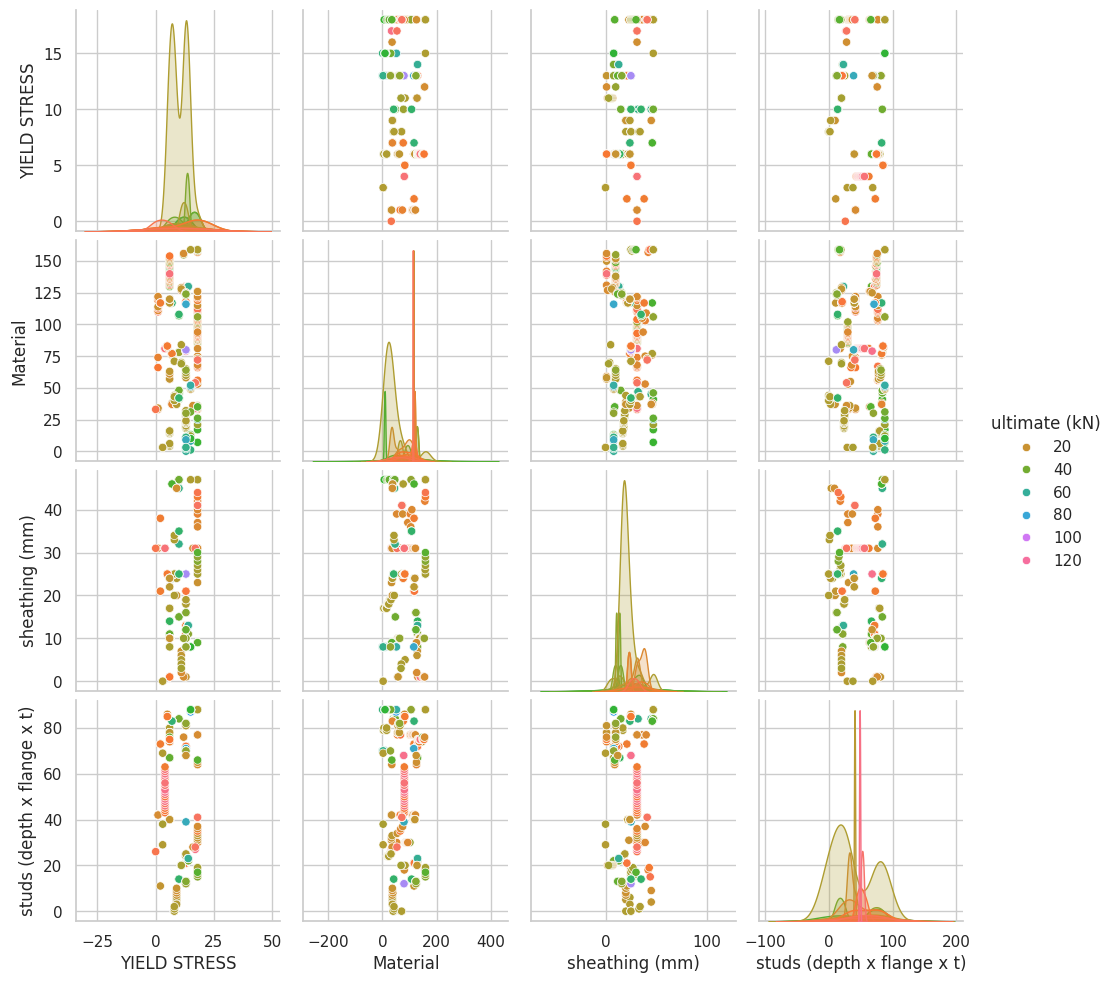

In [67]:
import seaborn as sns

quantitative_features_list1 = [ 'YIELD STRESS','Material','sheathing (mm)','studs (depth x flange x t)','ultimate (kN)']
data_plot_data=data_mod_num = data_mod_lc[quantitative_features_list1]
sns.pairplot(data_plot_data, hue="ultimate (kN)", palette="husl")

<ipython-input-69-b2ccaccc0c51>:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # Adjust layout to fit elements
<ipython-input-69-b2ccaccc0c51>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit elements
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


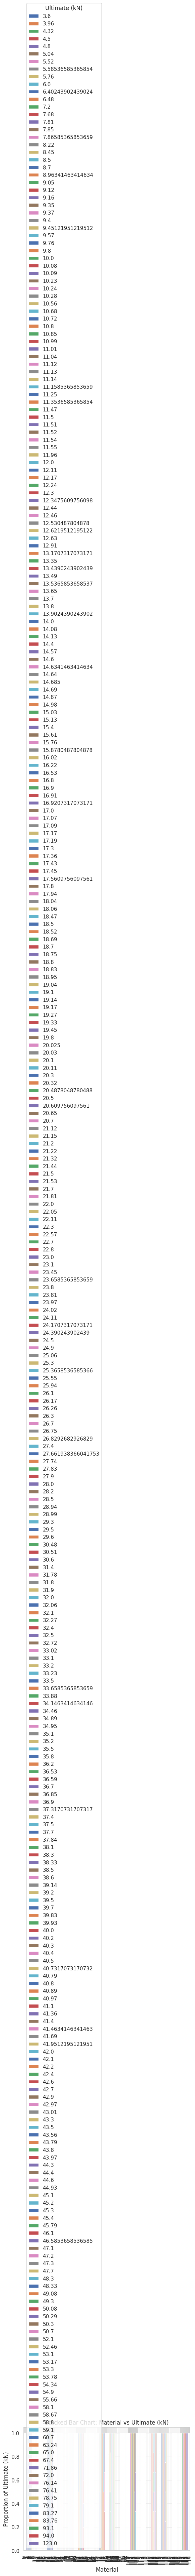

In [69]:
# Create a crosstab of Material vs. ultimate (kN)
table = pd.crosstab(data_mod_lc['Material'], data_mod_lc['ultimate (kN)'])

# Normalize the crosstab by dividing by the sum of each row
table_normalized = table.div(table.sum(1).astype(float), axis=0)

# Plot the stacked bar chart
table_normalized.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart: Material vs Ultimate (kN)')
plt.xlabel('Material')
plt.ylabel('Proportion of Ultimate (kN)')
plt.legend(title='Ultimate (kN)')  # Optional: add a legend title
plt.tight_layout()  # Adjust layout to fit elements
plt.show()


<ipython-input-70-c75a26e02664>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ultimate (kN)',data=data, palette='hls')


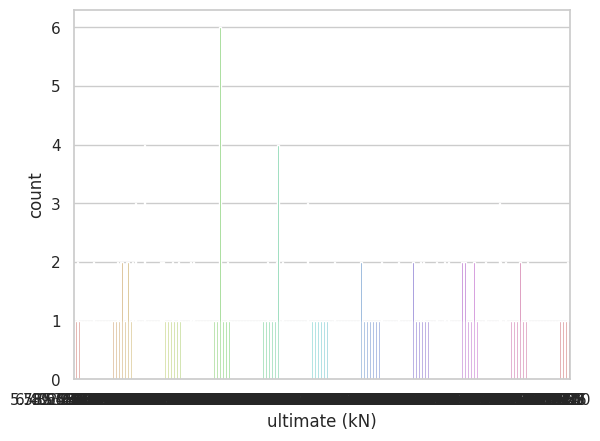

In [70]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='ultimate (kN)',data=data, palette='hls')
plt.show()

In [74]:
import pandas as pd
# Replace categorical columns with one-hot encoded columns
data_one_hot = pd.get_dummies(data_mod_lc, columns=['Material', 'sheathing (mm)', 'studs (depth x flange x t)', 'YIELD STRESS'], drop_first=True)

# Display the first few rows of the updated DataFrame
data_one_hot.head()

,Length (ft),Height (ft),Aspect ratio,Field spa (mm),Perimeter spa (mm),Stiffness (N/mm),Elastic (kN),ultimate (kN),D elastic (mm),D Ultimate (mm),...,YIELD STRESS_9,YIELD STRESS_10,YIELD STRESS_11,YIELD STRESS_12,YIELD STRESS_13,YIELD STRESS_14,YIELD STRESS_15,YIELD STRESS_16,YIELD STRESS_17,YIELD STRESS_18
0,12.0,12.0,1.000000,15,12,2275.0,7.1973,21.81,3.163648,0.0,...,False,False,False,False,False,False,False,False,False,True
1,16.0,12.0,0.750000,15,12,1767.5,9.1542,27.74,5.179180,0.0,...,False,False,False,False,False,False,False,False,False,True
2,24.0,12.0,0.500000,15,12,2170.0,12.6489,38.33,5.828986,0.0,...,False,False,False,False,False,False,False,False,False,True
3,12.0,10.0,0.833333,15,12,1802.5,6.5340,19.80,3.624965,0.0,...,False,False,False,False,False,False,False,False,False,True
4,16.0,10.0,0.625000,15,12,2537.5,8.2698,25.06,3.259034,0.0,...,False,False,False,False,False,False,False,False,False,True


In [75]:

X = data_one_hot.loc[:, data_one_hot.columns != 'ultimate (kN)'].drop(columns=['D Ultimate (mm)'])
y = data_one_hot[['ultimate (kN)', 'D Ultimate (mm)']]

# Check the shapes of X and y
print(X.shape, y.shape)


(422, 321) (422, 2)


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create an imputer for numerical data
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Impute y_train and y_test
y_train = imputer.fit_transform(y_train)
y_test = imputer.transform(y_test)


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.0401182943327637e+20
R^2 Score: -1.1012646633866102e+17
